## Полиномиальный конгруэнтный генератор


Используем многочлен 5-й степени.

In [ ]:
def pcg(m, arr, seed):
    return (arr[0] * seed ** 5 + arr[1] * seed ** 4 + arr[2] * seed ** 3 + arr[3] * seed ** 2 + arr[4] * seed + arr[5]) % m

## Инверсный конгруэнтный генератор

In [ ]:
def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)

def inv(a, m):
    gcd, x, y = egcd(a, m)
    if gcd != 1:
        return None
    else:
        return x % m

def icg(m, a, c, seed):
    if (seed == 0):
        return c
    return (a * inv(seed, m) + c) % m

## Получение выборок

In [ ]:
count = 20
size = 100

In [ ]:
sample_pcg = []
arr, m1, seed = [205, 936, 1399, 625, 6571, 29573], 139968, 1
for i in range(count):
    sample = []
    for j in range(size):
        seed = pcg(m1, arr, seed)
        sample.append(seed)
    sample_pcg.append(sample)

In [ ]:
sample_icg = []
seed, a, c, m2 = 1, 1, 1, 104729
for i in range(count):
    sample = []
    for j in range(size):
        seed = icg(m2, a, c, seed)
        sample.append(seed)
    sample_icg.append(sample)

## Подсчет среднего, отклонения и коэффициента вариации

In [ ]:
import numpy as np
import pandas as pd

sample_pcg = np.array(sample_pcg)
sample_icg = np.array(sample_icg)

In [ ]:
data_pcg = {'mean' : [], 'std' : [], 'cv' : []}
for sample in sample_pcg:
    mn = np.mean(sample)
    st = np.std(sample)
    data_pcg['mean'].append(np.round(mn, 1))
    data_pcg['std'].append(np.round(st, 1))
    data_pcg['cv'].append(np.round(st / mn, 3))

In [ ]:
df_pcg = pd.DataFrame(data=data_pcg.values(), index=["Среднее", "Отклонение", "Коэф. вариации"], columns=list(map(str, range(1, count + 1))))
df_pcg

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Среднее,62893.700,67029.400,71804.400,67680.300,63625.200,66585.900,79154.200,66441.900,76919.300,69321.900,79678.400,70612.100,68976.300,73941.400,68659.50,64120.600,68826.500,68262.000,75750.000,64333.700
Отклонение,37602.100,40285.500,38708.400,43716.200,41748.700,40774.500,39664.500,43294.800,39679.400,39664.000,41085.700,40064.400,38522.600,38260.100,38475.80,42060.800,38144.800,37065.700,41427.400,40879.300
Коэф. вариации,0.598,0.601,0.539,0.646,0.656,0.612,0.501,0.652,0.516,0.572,0.516,0.567,0.558,0.517,0.56,0.656,0.554,0.543,0.547,0.635


In [ ]:
data_icg = {'mean' : [], 'std' : [], 'cv' : []}
for sample in sample_icg:
    mn = np.mean(sample)
    st = np.std(sample)
    data_icg['mean'].append(np.round(mn, 1))
    data_icg['std'].append(np.round(st, 1))
    data_icg['cv'].append(np.round(st / mn, 3))

In [ ]:
df_icg = pd.DataFrame(data=data_icg.values(), index=["Среднее", "Отклонение", "Коэф. вариации"], columns=list(map(str, range(1, count + 1))))
df_icg

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Среднее,52241.600,55154.700,53762.200,55237.000,53622.400,49127.20,50114.500,50513.800,52058.000,50352.500,54878.600,53924.000,51139.60,53146.30,52132.400,54279.60,49485.700,50991.800,53010.100,55542.700
Отклонение,28834.100,31513.800,29838.900,30857.300,29396.600,29966.30,29527.100,30490.000,31292.900,29357.200,27866.000,31490.700,28106.10,30815.10,29280.400,29844.60,28150.600,30126.900,30477.500,29600.800
Коэф. вариации,0.552,0.571,0.555,0.559,0.548,0.61,0.589,0.604,0.601,0.583,0.508,0.584,0.55,0.58,0.562,0.55,0.569,0.591,0.575,0.533


## Хи-квадрат

In [ ]:
N = size
k = round(1 + np.log2(N))
p = 1 / k
print(k)

8


In [ ]:
chi_probs = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
chi_sq_th = np.array([1.239, 2.167, 4.255, 6.346, 9.037, 14.07, 18.48])

In [ ]:
borders = [m1 // k * i for i in range(1, k)]
for sample in sample_pcg:
    freq_vect = np.array([np.sum(sample <= borders[0])] + [sum([borders[i] < elem <= borders[i + 1] for elem in sample]) for i in range(k - 2)] + [np.sum(sample > borders[-1])])
    chi_sq_exp = 1 / N * np.sum(freq_vect ** 2 / p) - N
    if (chi_sq_exp > chi_sq_th[-1]) or (chi_sq_exp < chi_sq_th[0]):
        print('Гипотеза о случайности равномерного генератора не выполняется')
    else:
        print(f'Гипотеза о случайности равномерного генератора выполняется с вероятностью: {chi_probs[np.argmin(np.abs(chi_sq_th - chi_sq_exp))]}')

Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.5
Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.25
Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.5
Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.75
Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.75
Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.75
Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.5
Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.75
Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.5
Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.05
Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.95
Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.25
Гипотеза о случайности равномерного генерато

In [ ]:
borders = [m2 // k * i for i in range(1, k)]
for sample in sample_icg:
    freq_vect = np.array([np.sum(sample <= borders[0])] + [sum([borders[i] < elem <= borders[i + 1] for elem in sample]) for i in range(k - 2)] + [np.sum(sample > borders[-1])])
    chi_sq_exp = 1 / N * np.sum(freq_vect ** 2 / p) - N
    if (chi_sq_exp > chi_sq_th[-1]) or (chi_sq_exp < chi_sq_th[0]):
        print('Гипотеза о случайности равномерного генератора не выполняется')
    else:
        print(f'Гипотеза о случайности равномерного генератора выполняется с вероятностью: {chi_probs[np.argmin(np.abs(chi_sq_th - chi_sq_exp))]}')

Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.25
Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.25
Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.5
Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.05
Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.25
Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.95
Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.05
Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.05
Гипотеза о случайности равномерного генератора не выполняется
Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.25
Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.5
Гипотеза о случайности равномерного генератора выполняется с вероятностью: 0.25
Гипотеза о случайности равномерного генератора выполняется с

## Тесты

In [ ]:
size = 66666

In [ ]:
test_sample_pcg = []
for i in range(size):
    seed = pcg(111923, arr, seed)
    test_sample_pcg.append(seed % 2)

In [ ]:
test_sample_icg = []
for i in range(size):
    seed = icg(m2, a, c, seed)
    test_sample_icg.append(seed % 2)

### NIST: частотный побитовый тест

In [ ]:
import math

def frequency(sample, n):
    ones = sum(sample)
    zeroes = n - ones
    s_n = ones - zeroes
    s_obs = abs(s_n) / math.sqrt(n)
    p_value = math.erfc(s_obs / math.sqrt(2))
    success = (p_value >= 0.01)
    return (success, p_value, ones, zeroes)

In [ ]:
frequency(test_sample_pcg, size)

(True, 0.9938196436697042, 33334, 33332)

In [ ]:
frequency(test_sample_icg, size)

(True, 0.06302128437657373, 33093, 33573)

### NIST: частотный блочный тест

In [ ]:
import scipy.special as ss

def block_frequency(sample, M, n): # M - размер блока
    N = n // M
    pi = np.array([sum(sample[i * M  : (i + 1) * M]) / M for i in range(N)]) # вычисляем доли единиц в каждом блоке
    chi_sq = 4 * M * np.sum((pi - 0.5) ** 2)
    p_value = ss.gammaincc(N / 2, chi_sq / 2)
    success = (p_value >= 0.01)
    return (success, p_value)

In [ ]:
block_frequency(test_sample_pcg, 32, size)

(True, 1.0)

In [ ]:
block_frequency(test_sample_icg, 32, size)

(True, 0.6739468812332329)

### NIST: тест на последовательность одинаковых битов

In [ ]:
def runs(sample, n):
    pi = sum(sample) / n
    tau = 2 / math.sqrt(n)
    if abs(pi - 0.5) >= tau:
        return (False, 0)

    V_n = sum([sample[i] != sample[i + 1] for i in range(n - 1)]) + 1
    p_value = math.erfc(abs(V_n - 2 * pi * n * (1 - pi)) / (2 * math.sqrt(2 * n) * pi * (1 - pi)))
    success = (p_value >= 0.01)
    return (success, p_value)

In [ ]:
runs(test_sample_pcg, size)

(False, 0.0)

In [ ]:
runs(test_sample_icg, size)

(False, 6.057787835926238e-15)

Два теста из трёх прошли. Это согласуется и с четвертым пунктом, где для подавляющего большинства выборок выполняется гипотеза о равномерности генератора с различными вероятностями. Мы можем быть довольными результатами, т.к. используемые генераторы основаны на линейном конгруэнтном методе, который был изобретен в середине прошлого века.

## Время генерации

In [ ]:
import random
import time
import matplotlib.pyplot as plt

In [ ]:
sizes = [1000, 5000, 10000, 50000, 100000, 200000, 500000, 700000, 1000000]
pcg_time = []
icg_time = []
random_time = []

for size in sizes:
    start = time.perf_counter()
    for _ in range(size):
        seed = pcg(m1, arr, seed)
    finish = time.perf_counter()
    pcg_time.append(finish - start)

    start = time.perf_counter()
    for _ in range(size):
        seed = icg(m2, a, c, seed)
    finish = time.perf_counter()
    icg_time.append(finish - start)

    start = time.perf_counter()
    for _ in range(size):
        random.randint(0, m2 - 1)
    finish = time.perf_counter()
    random_time.append(finish - start)

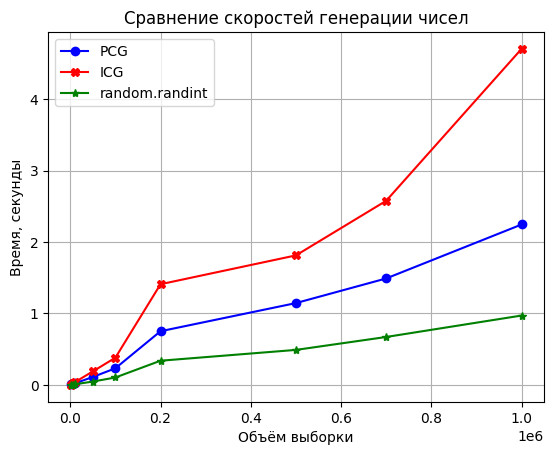

In [ ]:
plt.plot(sizes, pcg_time, 'b', marker='o')
plt.plot(sizes, icg_time, 'r', marker='X')
plt.plot(sizes, random_time, 'g', marker='*')
plt.grid(True)
plt.legend(['PCG', 'ICG', 'random.randint'])
plt.xlabel('Объём выборки')
plt.ylabel('Время, секунды')
plt.title('Сравнение скоростей генерации чисел')
plt.show()